In [1]:
import pandas as pd
import torch
from train import load_checkpoint
import data_process as dp
torch.__version__

'2.2.1'

In [2]:
model, _ = load_checkpoint("./")

In [3]:
model

GPT(
  (token_embedding_table): Embedding(20, 128)
  (position_embedding_table): Embedding(128, 128)
  (blocks): Sequential(
    (0): Block(
      (ln_1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (attn): CausalSelfAttention(
        (c_attn): Linear(in_features=128, out_features=384, bias=True)
        (c_proj): Linear(in_features=128, out_features=128, bias=True)
        (attn_dropout): Dropout(p=0.1, inplace=False)
        (resid_dropout): Dropout(p=0.1, inplace=False)
      )
      (ln_2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (mlp): Sequential(
        (0): Linear(in_features=128, out_features=512, bias=True)
        (1): ReLU()
        (2): Linear(in_features=512, out_features=128, bias=True)
        (3): Dropout(p=0.1, inplace=False)
      )
    )
    (1): Block(
      (ln_1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (attn): CausalSelfAttention(
        (c_attn): Linear(in_features=128, out_features=384, bias=True)
     

In [4]:
df = pd.read_csv("./data-venome.csv")

In [5]:
df

,name,3Di
0,Gh_comp10207_c0_seq2.pdb,DWFQVLCVPHDQQLFWFWQDDPDDPVPTDTWGFPDKDADPQWDDCV...
1,Gh_comp1045_c0_seq1.pdb,DLQLQQDAQVVLLVVLVADLQQWAAPVSLVVQCVVAPWQAADDDDD...
2,Gh_comp10466_c0_seq1.pdb,DVVVVVVDDLVRNLVVVVVCCVVVVVVLVVPDDDDPLVVVVVVVVV...
3,Gh_comp1063_c0_seq1.pdb,DQFDFPVQLLPDPDPVSLVVSDDPPGDFDPDFFFAEEEEAAPQQQA...
4,Gh_comp1068_c0_seq5.pdb,DPPPDPDPPDQPDQDLQFDDDPVVLVVLLPDDDDQVFWWWAADPFQ...
...,...,...
381,Lh14_comp82_c1_seq1.pdb,DVVVVVVVVVVVVVLCVQAVQDPVLLVVLVVLLVVLLVVLLVVQPP...
382,Lh14_comp82_c1_seq3.pdb,DVPPLVPPDPPDDDDDDQPADDPVLLVLLVVLLVCLLVVLCVQCVP...
383,Lh14_comp835_c0_seq1.pdb,DDFFDFDDQDWFQWLVGIDGCLVVLAQAKEKEWEAFDFPDDLVLVQ...
384,Lh14_comp862_c0_seq1.pdb,DPPPVVVVVVVVVVVVVVLVVVQVVVVVAPPPDDDDDDDDDDDDDD...


In [6]:
import umap

mapper = umap.UMAP()

/usr/local/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.11/site-packages/umap/distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argume

In [7]:
def to_embedding(df):
	with torch.no_grad():
		res = []
		for repr, name in zip(df["3Di"], df["name"]):
			seq = torch.tensor([dp.encode(repr)], dtype=torch.long)
			embeddings = model.seq_embeddings(seq)
			embeddings = embeddings.mean(0)
			res.append(embeddings)
		return torch.stack(res)
res = to_embedding(df)

In [8]:
res

tensor([[-0.4200,  0.8478,  1.3197,  ..., -1.2708,  2.8674,  1.3329],
        [-0.5279,  0.2460, -0.6988,  ...,  0.7093, -1.0002,  1.1108],
        [ 1.4241, -1.5072, -3.1751,  ...,  0.2127,  0.1738,  0.6897],
        ...,
        [-1.2491,  0.3644,  2.5135,  ...,  0.1585,  2.4529, -1.8874],
        [ 0.4278,  0.9904,  3.0891,  ..., -0.5291,  3.0516,  1.9168],
        [ 0.1902, -0.7184, -0.6209,  ..., -0.6845, -0.2742,  0.9537]])

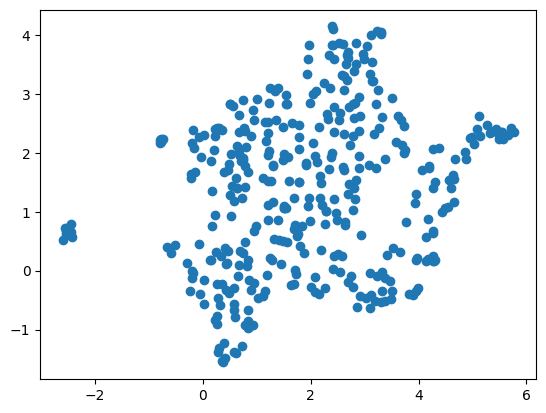

In [9]:
import matplotlib.pyplot as plt

embed2D = mapper.fit_transform(res)
plt.scatter(embed2D[:, 0], embed2D[:, 1])

In [14]:
df["x"] = embed2D[:, 0]
df["y"] = embed2D[:, 1]

In [27]:
import jscatter
scatter = jscatter.Scatter(data=df, x='x', y='y')
scatter.opacity(by='density')
scatter.height(480)
scatter.show()

In [35]:
select = scatter.selection()    
df.loc[select.tolist()]

,name,3Di,x,y
51,Gh_comp2027_c0_seq4.pdb,DVVVVVVVVVQVVLLQVVLVVLQVQQPPLCWHWDPPVTWIDRPQWI...,-2.547222,0.731166
48,Gh_comp2027_c0_seq10.pdb,DWDWDDPVPLDTDTDDDPPDDPVVVVVPPCPPPVCPDVVPDLSQHQ...,-2.538128,0.673332
111,Gh_comp6082_c0_seq1.pdb,DPFPEDEAPWFLLRLLCLLDDPFWHRDPSFWIDGVQFKIWGDHGSQ...,-2.484697,0.740491
47,Gh_comp2027_c0_seq1.pdb,DPLDPLNCVQVVVVVPLPPQQLVVQADCVAWADPDSAWIHGPQWIW...,-2.538275,0.622568
307,Lh14_comp2080_c0_seq1.pdb,DVVVVVVVVVVVVVVVVVVVQVVVVDDVVPPPVVVVPPDDDVPPPP...,-2.517319,0.645618
41,Gh_comp1786_c0_seq1.pdb,DDDDDDDDDDPDQPAPPLDPPPPVPPPVPQQEHQEYEDEPNDDADP...,-2.451281,0.791446
52,Gh_comp2027_c0_seq6.pdb,DAQEDADEQPLDQDDDFCNCVPVLNHAEYHDEQHAHAAAACSNCPN...,-2.444207,0.664249
96,Gh_comp4656_c0_seq5.pdb,DDPPDDDDDDDDDDDDDDPPPPDDQWDDDPFWTWGDDPQEIETEGD...,-2.497770,0.622737
50,Gh_comp2027_c0_seq2.pdb,DDDDDDDDDDDDDPPDPPPQFLCPDAPPVQWDDPDSFWIDGDQWIW...,-2.468803,0.603226
95,Gh_comp4656_c0_seq2.pdb,DAPEQDADADAALVVCQPVQQDAEYAHANYAYQAQADPPVDGDARH...,-2.418971,0.578911


In [32]:
df.loc[[ 51,  47,  41,  96,  50, 119,  95]]

,name,3Di,x,y
51,Gh_comp2027_c0_seq4.pdb,DVVVVVVVVVQVVLLQVVLVVLQVQQPPLCWHWDPPVTWIDRPQWI...,-2.547222,0.731166
47,Gh_comp2027_c0_seq1.pdb,DPLDPLNCVQVVVVVPLPPQQLVVQADCVAWADPDSAWIHGPQWIW...,-2.538275,0.622568
41,Gh_comp1786_c0_seq1.pdb,DDDDDDDDDDPDQPAPPLDPPPPVPPPVPQQEHQEYEDEPNDDADP...,-2.451281,0.791446
96,Gh_comp4656_c0_seq5.pdb,DDPPDDDDDDDDDDDDDDPPPPDDQWDDDPFWTWGDDPQEIETEGD...,-2.497770,0.622737
50,Gh_comp2027_c0_seq2.pdb,DDDDDDDDDDDDDPPDPPPQFLCPDAPPVQWDDPDSFWIDGDQWIW...,-2.468803,0.603226
119,Gh_comp6889_c0_seq1.pdb,DQEDEDEDVVDRPPVPVVLVDDPRHAEYEYEHDACVVVVVVNVVVC...,-2.596164,0.515908
95,Gh_comp4656_c0_seq2.pdb,DAPEQDADADAALVVCQPVQQDAEYAHANYAYQAQADPPVDGDARH...,-2.418971,0.578911
